In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model


In [34]:
#Get the Dataset
df=pd.read_csv("BACstock.csv",na_values=['null'],parse_dates=True,infer_datetime_format=True)
df.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,11.86,11.90,11.72,11.760,145217221,BAC
1,2/11/2013,11.73,11.90,11.67,11.860,103499848,BAC
2,2/12/2013,11.87,12.34,11.78,12.245,231771561,BAC
3,2/13/2013,12.35,12.42,12.05,12.170,192478919,BAC
4,2/14/2013,12.09,12.27,12.07,12.130,143901737,BAC


In [35]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1259, 7)
Null Value Present:  False


<AxesSubplot:>

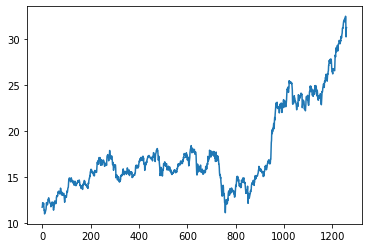

In [36]:
#Plot the True Adj Close Value
df["close"].plot()

In [45]:
#Set Target Variable
testdf = df["close"]
testdf


0       11.760
1       11.860
2       12.245
3       12.170
4       12.130
         ...  
1254    32.500
1255    31.950
1256    30.260
1257    31.200
1258    31.250
Name: close, Length: 1259, dtype: float64

In [44]:
#Selecting the Features
traindf = df.drop(columns=['close'])
traindf

,date,open,high,low,volume,Name
0,2/8/2013,11.86,11.90,11.72,145217221,BAC
1,2/11/2013,11.73,11.90,11.67,103499848,BAC
2,2/12/2013,11.87,12.34,11.78,231771561,BAC
3,2/13/2013,12.35,12.42,12.05,192478919,BAC
4,2/14/2013,12.09,12.27,12.07,143901737,BAC
...,...,...,...,...,...,...
1254,2/1/2018,32.00,32.50,31.96,62367448,BAC
1255,2/2/2018,32.44,32.67,31.86,96971924,BAC
1256,2/5/2018,31.12,31.98,29.15,155908256,BAC
1257,2/6/2018,29.41,31.29,29.30,165878399,BAC


In [48]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df['close'])
feature_transform= pd.DataFrame(columns='close', data=feature_transform, index=df.index)
feature_transform.head()

ValueError: Expected 2D array, got 1D array instead:
array=[11.76  11.86  12.245 ... 30.26  31.2   31.25 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_train = 

In [7]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = testdf[:len(train_index)].values.ravel(), testdf[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [8]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [19]:
# apply LinearRegression this is the code for the machine learning algorithm
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier


LogisticRegression()

In [31]:
# Train the Logistic Regression model on the unscaled data and print the model score
# this is what the machine algotirhtm will train and validate the data it learned.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, output_var, random_state=1)

ValueError: Found input variables with inconsistent numbers of samples: [4, 1259]

In [21]:
y_train

,close
date,
2014-05-09,14.74
2014-05-22,14.71
2017-10-19,26.58
2015-09-23,15.72
2015-04-22,15.74
...,...
2015-12-10,17.20
2016-09-13,15.72
2017-06-16,23.43


In [27]:
y_train.dtypes

close    float64
dtype: object

In [22]:
y_test

,close
date,
2016-12-16,22.66
2015-12-16,17.75
2016-12-28,22.33
2015-04-17,15.56
2015-02-23,16.20
...,...
2016-03-23,13.62
2016-09-09,15.74
2013-02-25,11.03


In [28]:
X_train.dtypes

open      float64
high      float64
low       float64
volume    float64
dtype: object

In [29]:
X_test.dtypes

open      float64
high      float64
low       float64
volume    float64
dtype: object

In [26]:
y_test.dtypes

close    float64
dtype: object

In [23]:
classifier.fit(X_train, y_train)

/Users/ngocdiep/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'

In [30]:
# Scale the data: 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="lbfgs", random_state=19)
classifier

#Train our model
classifier.fit(X_train_scaled, y_train)
classifier.score(X_test_scaled, y_test)

/Users/ngocdiep/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'

In [9]:
# from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
# # from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
# from keras.models import load_model

# from keras.utils.vis_utils import plot_model

#Building the LSTM Model
# lstm = Sequential()
# lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
# lstm.add(Dense(1))
# lstm.compile(loss='mean_squared_error', optimizer='adam')
# plot_model(lstm, show_shapes=True, show_layer_names=True)

: 

: 

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 1s 873us/step - loss: 271.3398
Epoch 2/100
144/144 [==============================] - 0s 871us/step - loss: 208.4401
Epoch 3/100
144/144 [==============================] - 0s 868us/step - loss: 108.4617
Epoch 4/100
144/144 [==============================] - 0s 844us/step - loss: 31.8400
Epoch 5/100
144/144 [==============================] - 0s 845us/step - loss: 8.4084
Epoch 6/100
144/144 [==============================] - 0s 850us/step - loss: 5.2437
Epoch 7/100
144/144 [==============================] - 0s 856us/step - loss: 4.6046
Epoch 8/100
144/144 [==============================] - 0s 892us/step - loss: 4.2038
Epoch 9/100
144/144 [==============================] - 0s 828us/step - loss: 3.8417
Epoch 10/100
144/144 [==============================] - 0s 863us/step - loss: 3.4981
Epoch 11/100
144/144 [==============================] - 0s 832us/step - loss: 3.1703
Epoch 12/100
144/144 [==============================] - 0s 829us/st

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

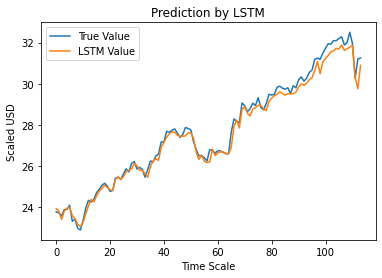

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
# LSTMacc = round((accuracy_score(y_test,y_pred)*100),2)
# print(LSTMacc)

ValueError: continuous is not supported